In [20]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [68]:
data = []
for file in os.listdir('data/train'):
    df = pd.read_csv('data/train/' + file, sep='|')
    sepsis_index = df[df['SepsisLabel'] == 1].first_valid_index()
    df['len'] = len(df) if sepsis_index is None else sepsis_index + 1
    df['label'] = 1 if sepsis_index is not None else 0
    data.append(df.iloc[0:1])

In [69]:
preliminary_data = pd.concat(data)

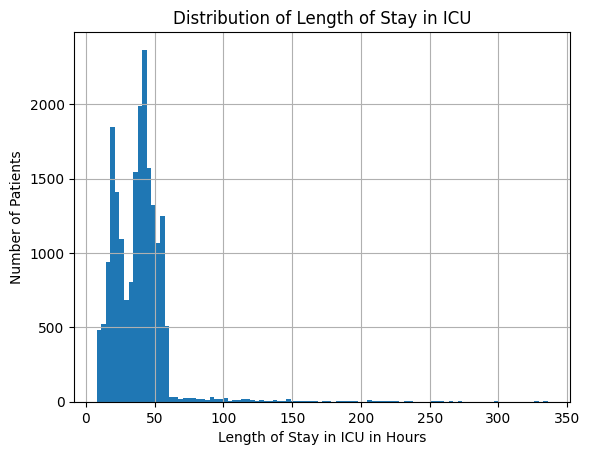

In [17]:
preliminary_data.hist(column='len', bins=100)
plt.title('Distribution of Length of Stay in ICU')
plt.xlabel('Length of Stay in ICU in Hours')
plt.ylabel('Number of Patients')
plt.show()

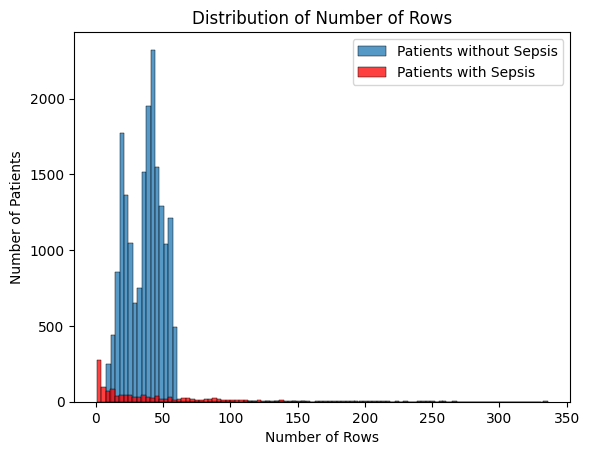

In [37]:
sns.histplot(data=preliminary_data[preliminary_data['label'] == 0], x='len', bins=100, label='Patients without Sepsis')
sns.histplot(data=preliminary_data[preliminary_data['label'] == 1], x='len', bins=100, color='red', label='Patients with Sepsis')
plt.legend()
plt.title('Distribution of Number of Rows')
plt.xlabel('Number of Rows')
plt.ylabel('Number of Patients')
plt.savefig('C:/Users/10/Documents/SemesterB/Lab 2 - Electric Boogaloo/HW1/graphs/length_dist.png', dpi=1200)
plt.show()

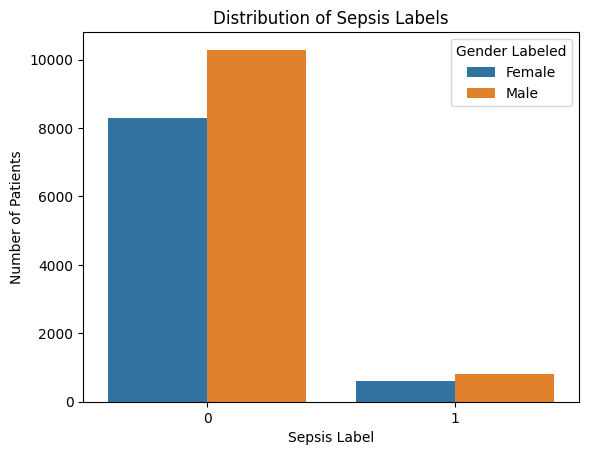

In [77]:
sns.countplot(data=preliminary_data, x='label', hue='Gender Labeled')
plt.title('Distribution of Sepsis Labels')
plt.xlabel('Sepsis Label')
plt.ylabel('Number of Patients')
plt.savefig('C:/Users/10/Documents/SemesterB/Lab 2 - Electric Boogaloo/HW1/graphs/sepsis_dist.png', dpi=1200)
plt.show()

In [42]:
count_zero = len(preliminary_data[preliminary_data['label'] == 0])
count_one = len(preliminary_data[preliminary_data['label'] == 1])

In [43]:
count_zero/(count_zero + count_one)

0.92925

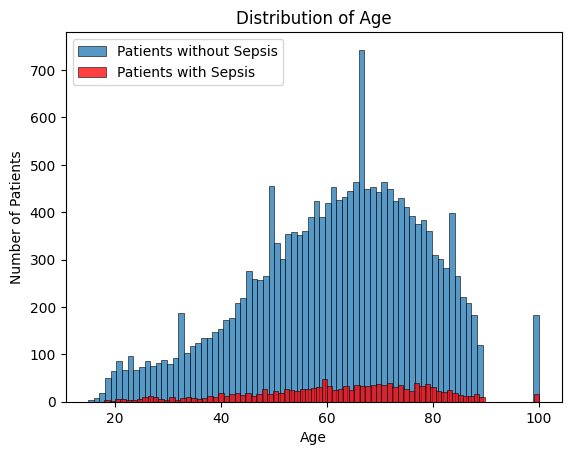

In [48]:
sns.histplot(data=preliminary_data[preliminary_data['label'] == 0], x='Age', bins=80, label='Patients without Sepsis')
sns.histplot(data=preliminary_data[preliminary_data['label'] == 1], x='Age', bins=80, color='red', label='Patients with Sepsis')
plt.legend()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.savefig('C:/Users/10/Documents/SemesterB/Lab 2 - Electric Boogaloo/HW1/graphs/age_dist.png', dpi=1200)
plt.show()

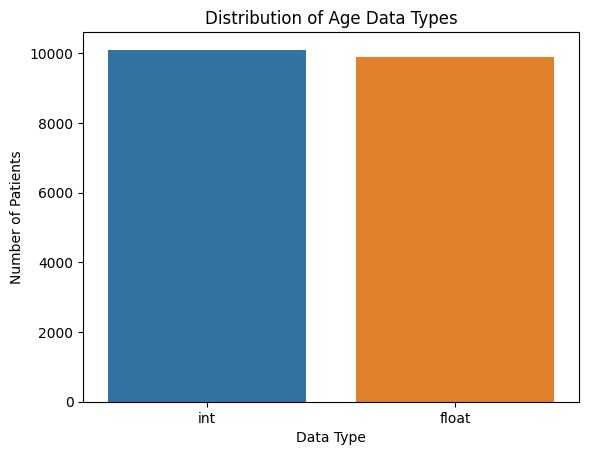

In [56]:
sns.barplot(x=['int', 'float'], y=[len(preliminary_data[preliminary_data['Age'].astype(int).astype(float) == preliminary_data['Age'].astype(float)]), len(preliminary_data[preliminary_data['Age'].astype(int).astype(float) != preliminary_data['Age'].astype(float)])])
plt.title('Distribution of Age Data Types')
plt.xlabel('Data Type')
plt.ylabel('Number of Patients')
plt.savefig('C:/Users/10/Documents/SemesterB/Lab 2 - Electric Boogaloo/HW1/graphs/age_type_dist.png', dpi=1200)
plt.show()

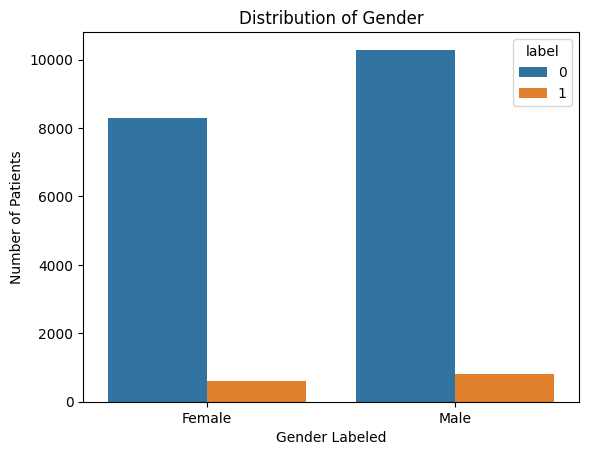

In [76]:
gender = {0:'Female', 1:'Male'}
preliminary_data['Gender Labeled'] = preliminary_data['Gender'].map(gender)
sns.countplot(data=preliminary_data, x='Gender Labeled', hue='label')
plt.ylabel('Number of Patients')
plt.title('Distribution of Gender')
plt.savefig('C:/Users/10/Documents/SemesterB/Lab 2 - Electric Boogaloo/HW1/graphs/gender_dist.png', dpi=1200)
plt.show()


In [89]:
from collections import defaultdict
def completly_missing():
    cols = defaultdict(lambda: 0)
    for file in os.listdir('data/train'):
        df = pd.read_csv('data/train/' + file, sep='|')
        for col in df.columns:
            if df[col].isnull().all():
                cols[col] += 1
    return cols

cols = completly_missing()
print(cols)
print(len(cols))

defaultdict(<function completly_missing.<locals>.<lambda> at 0x00000250D1019790>, {'EtCO2': 18433, 'BaseExcess': 13426, 'FiO2': 11168, 'pH': 10583, 'PaCO2': 10871, 'SaO2': 13482, 'AST': 12931, 'Alkalinephos': 13034, 'Bilirubin_direct': 19001, 'Lactate': 13800, 'Bilirubin_total': 12960, 'TroponinI': 16445, 'PTT': 10070, 'Fibrinogen': 17769, 'Unit1': 7686, 'Unit2': 7686, 'HCO3': 10074, 'Chloride': 9457, 'Magnesium': 2469, 'Phosphate': 6035, 'DBP': 3570, 'Hgb': 1222, 'Hct': 1155, 'WBC': 1306, 'Platelets': 1287, 'Calcium': 2680, 'Resp': 36, 'BUN': 1001, 'Creatinine': 1019, 'Glucose': 767, 'Potassium': 915, 'SBP': 136, 'MAP': 44, 'Temp': 131, 'O2Sat': 12, 'HR': 3})
36


In [87]:
set(pd.read_csv('data/train/patient_0.psv', sep='|').columns) - cols

{'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel'}